In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from functools import reduce

**The dictionary creation function, using the scenario name and number of replications**

In [12]:
def todict(experiment_number, scenario, replications):
    #scenario name starts with a capital
    scenario
        
    dic1 = {}
    dic2 = {}
    dic3 = {}
    dic4 = {}
    dic_all = {}
    
    for i in range(1, replications + 1):
        j = str(i)
        key = "rep" + j
        name = "Output_model_Experiment" + str(experiment_number) + "_" + scenario + "_Rep" + j + ".xlsx"
        dic1[key] = pd.read_excel(name)
        name2 = "Output_model_Experiment" + str(experiment_number) + "_" + scenario + str(2) + "_Rep" + j + ".xlsx"
        dic2[key] = pd.read_excel(name2)
        name3 = "Output_model_Experiment" + str(experiment_number) + "_" + scenario + str(3) + "_Rep" + j + ".xlsx"
        dic3[key] = pd.read_excel(name3)
        name4 = "Output_model_Experiment" + str(experiment_number) + "_" + scenario + str(4) + "_Rep" + j + ".xlsx"
        dic4[key] = pd.read_excel(name4)
        
    df_concat_dic1 = pd.concat(dic1.values())
    by_row_index_dic1 = df_concat_dic1.groupby(df_concat_dic1.index)
    df_means_dic1 = by_row_index_dic1.mean()
    
    df_concat_dic2 = pd.concat(dic2.values())
    by_row_index_dic2 = df_concat_dic2.groupby(df_concat_dic2.index)
    df_means_dic2 = by_row_index_dic2.mean()
    
    df_concat_dic3 = pd.concat(dic3.values())
    by_row_index_dic3 = df_concat_dic3.groupby(df_concat_dic3.index)
    df_means_dic3 = by_row_index_dic3.mean()
    
    df_concat_dic4 = pd.concat(dic4.values())
    by_row_index_dic4 = df_concat_dic4.groupby(df_concat_dic4.index)
    df_means_dic4 = by_row_index_dic4.mean()
    x=df_means_dic1.shape[0]
    
       
    return df_means_dic1, df_means_dic2, df_means_dic3, df_means_dic4, scenario, x, dic1, dic2, dic3, dic4

**Figure creation for the comparison of any two alternatives in a scnario**

In [17]:
def toplot(experiment_number,scenario, dic1, dic2, i, j, x):  #The dictionaries are those that will be merged, selected as on of four options
                                            #The values i and j are just for enumeration purposes. The value x is for the setting of the axis
    if(i == 1):
        a = "_30_64" #scenario alternative 1, 30 percent no-show, 64 unloading workers extra
    if(i == 2):
        a = "_0_56"  #scenario alternative 2, 0 percent no-show, 56 unloading workers extra
    if(i == 3):
        a = "_30_56" #scenario alternative 3, 30 percent no-show, 56 unloading workers extra
    
    if(j == 2):
        b = "_0_56"
    if(j == 3):
        b = "_30_56"
    if(j == 4):
        b = "_0_64"  #scenario alternative 4, 0 percent no-show, 64 unloading workers extra
    
    dock_selection_processed = dic1[["Time","Dockselection_processed"]].merge(dic2[["Time","Dockselection_processed"]], left_on='Time', right_on='Time', how='outer')
    dock_selection_processed.rename(columns = {'Dockselection_processed_x': 'Dockselection_processed' + a, 'Dockselection_processed_y': 'Dockselection_processed' + b}, inplace=True)
    plot_proc_dock=dock_selection_processed.plot(title = scenario, x="Time", y=['Dockselection_processed' + a, 'Dockselection_processed' + b], xticks=np.arange(0,x,48))
    plot_proc_dock.set_xlabel("hour of simulation")
    plot_proc_dock.set_ylabel("cargo units")
    fig = plot_proc_dock.get_figure()
    fig.savefig("Results/Plots" + str(experiment_number) + "/" + scenario + "/Dockselection")
    fig.savefig("Results/Plots" + str(experiment_number) + "/" + scenario + "/Dockselection" + a + b)
    print(dock_selection_processed.sum(axis=0))

    unloading_processed = dic1[["Time","Unloading_processed"]].merge(dic2[["Time","Unloading_processed"]], left_on='Time', right_on='Time', how='outer')
    unloading_processed.rename(columns = {'Unloading_processed_x': 'Unloading_processed' + a, 'Unloading_processed_y': 'Unloading_processed' + b}, inplace=True)
    plot_proc_unload=unloading_processed.plot(title = scenario, x="Time", y=['Unloading_processed' + a, 'Unloading_processed' + b], xticks=np.arange(0,x,48))
    plot_proc_unload.set_xlabel("hour of simulation")
    plot_proc_unload.set_ylabel("cargo units")
    fig = plot_proc_unload.get_figure()
    fig.savefig("Results/Plots" + str(experiment_number) + "/" + scenario + "/Unloading")
    fig.savefig("Results/Plots" + str(experiment_number) + "/" + scenario + "/Unloading" + a + b)
    print(unloading_processed.sum(axis=0))

    warehouse_processed = dic1[["Time","Warehouse_processed","Distant_warehouse_processed"]].merge(dic2[["Time","Warehouse_processed","Distant_warehouse_processed"]], left_on='Time', right_on='Time', how='outer')
    warehouse_processed.rename(columns = {'Warehouse_processed_x': 'Warehouse_processed' + a, 'Distant_warehouse_processed_x': 'Distant_warehouse_processed' + a, 'Warehouse_processed_y': 'Warehouse_processed' + b, 'Distant_warehouse_processed_y': 'Distant_warehouse_processed' + b}, inplace=True)
    plot_proc_warehouse=warehouse_processed.plot(title = scenario, x="Time", y=['Warehouse_processed' + a, 'Warehouse_processed' + b], xticks=np.arange(0,x,48))
    plot_proc_warehouse.set_xlabel("hour of simulation")
    plot_proc_warehouse.set_ylabel("cargo units")
    fig = plot_proc_warehouse.get_figure()
    fig.savefig("Results/Plots" + str(experiment_number) + "/" + scenario + "/Internal_warehouse")
    fig.savefig("Results/Plots" + str(experiment_number) + "/" + scenario + "/Internal_warehouse" + a + b)
    print(warehouse_processed.sum(axis=0))

    plot_proc_distant_warehouses=warehouse_processed.plot(title = scenario, x="Time", y=['Distant_warehouse_processed' + a, 'Distant_warehouse_processed' + b], xticks=np.arange(0,x,48))
    plot_proc_distant_warehouses.set_xlabel("hour of simulation")
    plot_proc_distant_warehouses.set_ylabel("cargo units")
    fig = plot_proc_distant_warehouses.get_figure()
    fig.savefig("Results/Plots" + str(experiment_number) + "/" + scenario + "/Distant_warehouses")
    fig.savefig("Results/Plots" + str(experiment_number) + "/" + scenario + "/Distant_warehouses" + a + b)
    print(warehouse_processed.sum(axis=0))

    delivery_processed = dic1[["Time","Relief aid demand"]].merge(dic2[["Time","Relief aid demand"]], left_on="Time", right_on="Time", how="outer")
    delivery_processed.rename(columns = {'Relief aid demand_x': 'Relief aid demand' + a, 'Relief aid demand_y': 'Relief aid demand' + b}, inplace=True)
    plot_proc_delivery =delivery_processed.plot(title=scenario, x="Time", y=['Relief aid demand' + a,'Relief aid demand' + b], xticks=np.arange(0,x,48))
    plot_proc_delivery.set_xlabel("hour of simulation")
    plot_proc_delivery.set_ylabel("cargo units")
    fig = plot_proc_delivery.get_figure()
    fig.savefig("Results/Plots" + str(experiment_number) + "/" + scenario + "/Delivery")
    fig.savefig("Results/Plots" + str(experiment_number) + "/" + scenario + "/Delivery" + a + b)
    print(delivery_processed.sum(axis=0))
 

**Main function, creating all plots and preparing them for analysis**

In [25]:
def main(experiment_number, scenario, replications):
    a = "_30_64"
    b = "_0_56"
    c = "_30_56"
    d = "_0_64"
    
    scenario = todict(experiment_number,scenario,replications)[4]
    x = todict(experiment_number,scenario,replications)[5]
    df = {}
    
    
    i=1
    j=i+1
    
    while i <= 3:
        dic1 = todict(experiment_number,scenario, replications)[i-1]
        while j <= 4:
            dic2 = todict(experiment_number,scenario,replications)[j-1]
            toplot(experiment_number, scenario, dic1, dic2, i, j, x)
            j = j + 1
        i = i + 1
        j = i + 1
     
    variables = ['Dockselection_processed', 'Unloading_processed', 'Warehouse_processed', 'Distant_warehouse_processed', 'Relief aid demand', 'Priority_demand_fullfiled']
    
    
    df = outputdictionary(experiment_number, scenario, replications, a, b, c, d)
    print(df.columns)
    
    for k in range(len(variables)):
        w = str(variables[k] + "_" + scenario + a)
        x = str(variables[k] + "_" + scenario + b)
        y = str(variables[k] + "_" + scenario + c)
        z = str(variables[k] + "_" + scenario + d)
        name = str(str(variables[k]) + scenario)
        
        name = df.plot(grid=True, fontsize = 35 , legend= False, x="Time", y= [w,x,y,z], xticks = np.arange(0,21,2.0), figsize = (20,10))
    
        fig=name.get_figure()
        fig.savefig("Results/Plots" + str(experiment_number) + "/" + str(scenario) + str(variables[k]), bbox_inches='tight')
        name.set_xlabel("Day of simulation", fontsize=20)
        name.set_ylabel("Tons per hour", fontsize=20)   
    
    
    return df

In [5]:
plot_proc_unload=df_final2.plot(grid=True, fontsize = 35, legend= False, x="Time", y=['unloading_processed_dic80_30_30','unloading_processed_dic80_30_0', "unloading_processed_dic80_0_30", "unloading_processed_dic80_0_0"], xticks=np.arange(0, 21, 2.0), figsize=(20,10))
plot_proc_unload.set_xlabel("Day of simulation", fontsize=35)
plot_proc_unload.set_ylabel("Tons per hour", fontsize=35)
fig=plot_proc_unload.get_figure()
fig.savefig("Results/Plots/"+alternative+"_processed_at_unloading", bbox_inches='tight')
print("unloading_processed_dic80_30_30 = " + str(df_final2["unloading_processed_dic80_30_30"].sum(axis=0)))
print("unloading_processed_dic80_30_0 = " + str(df_final2["unloading_processed_dic80_30_0"].sum(axis=0)))
print("unloading_processed_dic80_0_30 = " + str(df_final2["unloading_processed_dic80_0_30"].sum(axis=0)))
print("unloading_processed_dic80_0_0 = " + str(df_final2["unloading_processed_dic80_0_0"].sum(axis=0)))


NameError: name 'df_final2' is not defined

Time                             115440.000000
Dockselection_processed_30_64      2712.533333
Dockselection_processed_0_56       2894.933333
dtype: float64
Time                         115440.000000
Unloading_processed_30_64      4730.066667
Unloading_processed_0_56       5073.966667
dtype: float64
Time                                 115440.000000
Warehouse_processed_30_64              4604.766667
Distant_warehouse_processed_30_64         0.000000
Warehouse_processed_0_56               4968.166667
Distant_warehouse_processed_0_56          0.000000
dtype: float64
Time                                 115440.000000
Warehouse_processed_30_64              4604.766667
Distant_warehouse_processed_30_64         0.000000
Warehouse_processed_0_56               4968.166667
Distant_warehouse_processed_0_56          0.000000
dtype: float64
Time                       1.154400e+05
Relief aid demand_30_64    2.359539e+06
Relief aid demand_0_56     2.338984e+06
dtype: float64
Time                     

C:\Users\Dave\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Time                            115440.000000
Dockselection_processed_0_56      2894.933333
Dockselection_processed_0_64      2894.933333
dtype: float64
Time                        115440.000000
Unloading_processed_0_56      5073.966667
Unloading_processed_0_64      5073.966667
dtype: float64
Time                                115440.000000
Warehouse_processed_0_56              4968.166667
Distant_warehouse_processed_0_56         0.000000
Warehouse_processed_0_64              4968.166667
Distant_warehouse_processed_0_64         0.000000
dtype: float64
Time                                115440.000000
Warehouse_processed_0_56              4968.166667
Distant_warehouse_processed_0_56         0.000000
Warehouse_processed_0_64              4968.166667
Distant_warehouse_processed_0_64         0.000000
dtype: float64
Time                       115440.0
Relief aid demand_0_56    2338984.2
Relief aid demand_0_64    2338984.2
dtype: float64
Time                             115440.000000
Dockse

Time_Baseline_30_64  Dockselection_processed_Baseline_30_64  \
0                    0.0                                0.000000   
1                    1.0                                0.000000   
2                    2.0                                0.000000   
3                    3.0                                0.000000   
4                    4.0                                0.000000   
5                    5.0                                0.000000   
6                    6.0                                0.000000   
7                    7.0                                0.000000   
8                    8.0                                0.000000   
9                    9.0                               41.333333   
10                  10.0                                4.800000   
11                  11.0                                7.466667   
12                  12.0                                6.666667   
13                  13.0                                0.000000   
14                  14.0                               15.200000   
15                  15.0                                5.866667   
16                  16.0                                9.066667   
17                  17.0                                8.800000   
18                  18.0                                0.000000   
19                  19.0                                0.000000   
20                  20.0                                0.000000   
21                  21.0                                0.000000   
22                  22.0                                0.000000   
23                  23.0                                0.000000   
24                  24.0                                0.000000   
25                  25.0                                0.000000   
26                  26.0                                0.000000   
27                  27.0                                0.000000   
28                  28.0                                0.000000   
29                  29.0                                0.000000   
..                   ...                                     ...   
451                451.0                                0.000000   
452                452.0                                0.000000   
453                453.0                                0.000000   
454                454.0                                0.000000   
455                455.0                                0.000000   
456                456.0                                0.000000   
457                457.0                                0.000000   
458                458.0                                0.000000   
459                459.0                                0.000000   
460                460.0                                0.000000   
461                461.0                                0.000000   
462                462.0                                0.000000   
463                463.0                                0.000000   
464                464.0                                0.000000   
465                465.0                               46.933333   
466                466.0                               15.200000   
467                467.0                               17.066667   
468                468.0                               15.200000   
469                469.0                                0.000000   
470                470.0                               34.400000   
471                471.0                               14.666667   
472                472.0                               16.533333   
473                473.0                               17.866667   
474                474.0                                0.000000   
475                475.0                                0.000000   
476                476.0                                0.000000   
477                477.0                                0.000

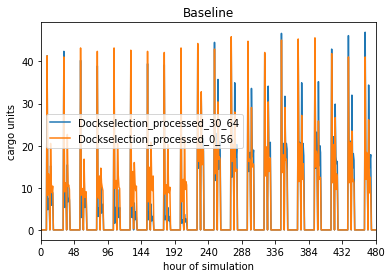

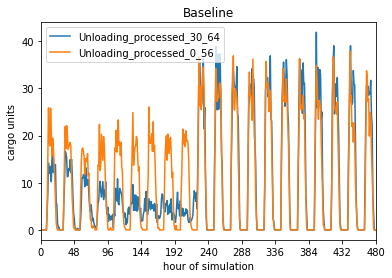

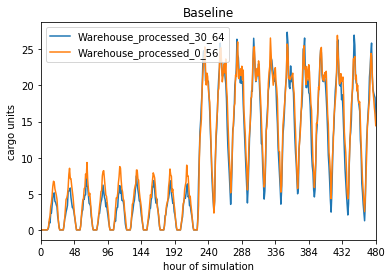

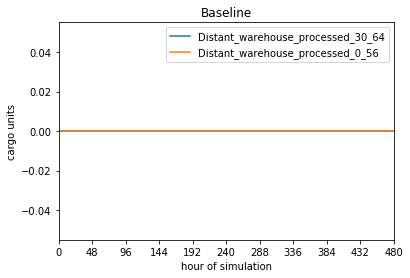

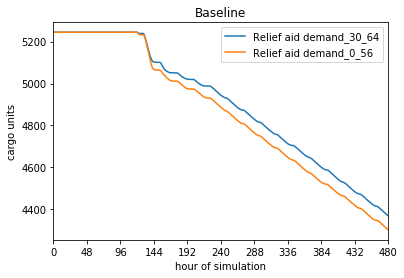

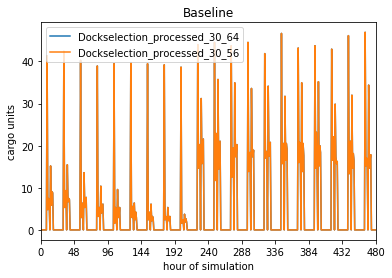

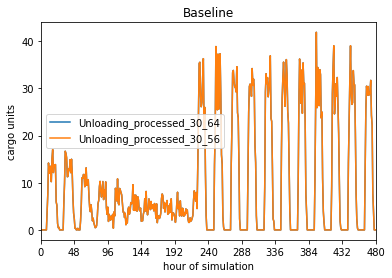

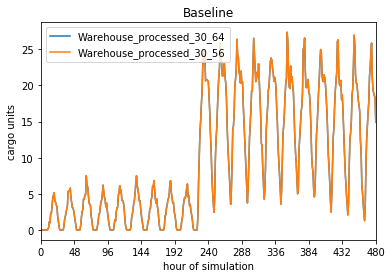

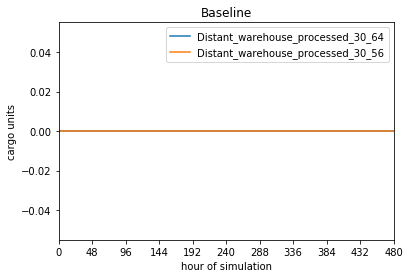

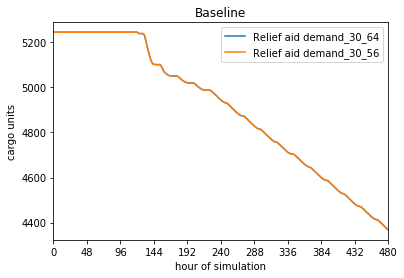

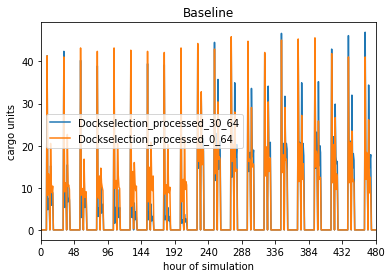

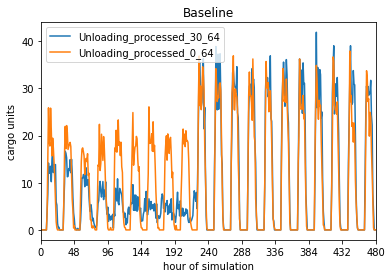

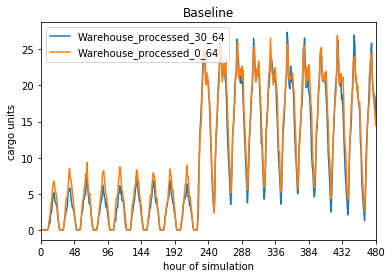

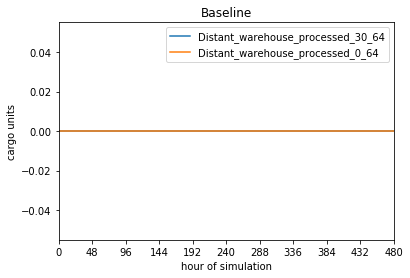

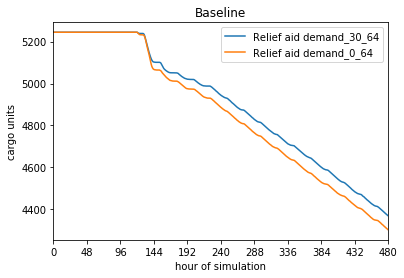

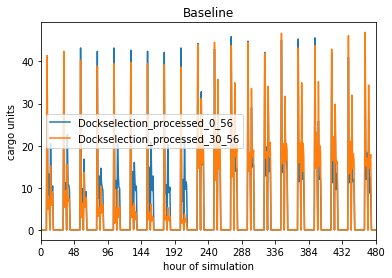

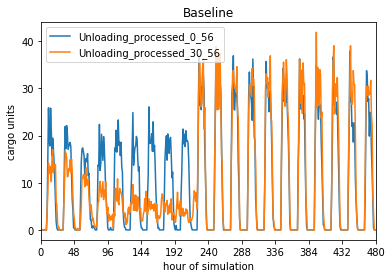

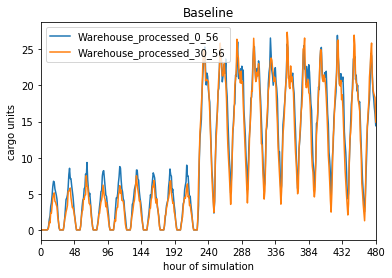

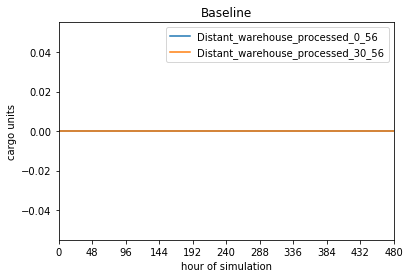

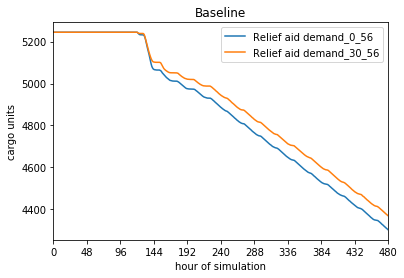

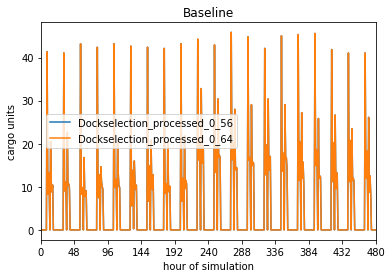

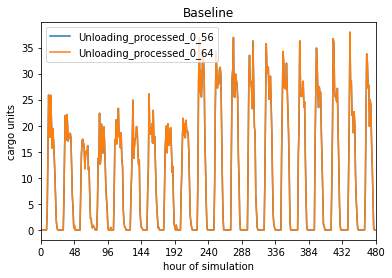

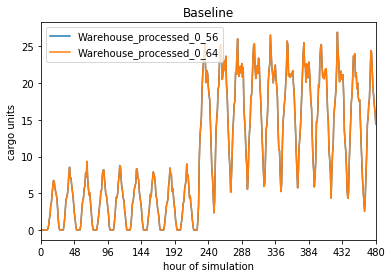

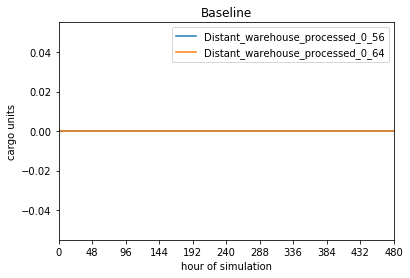

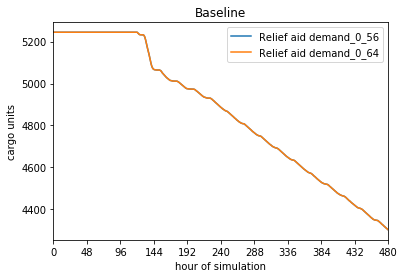

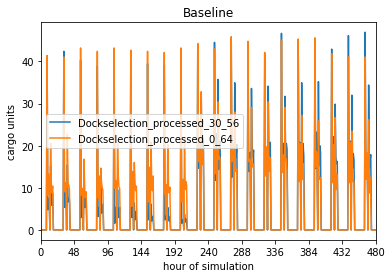

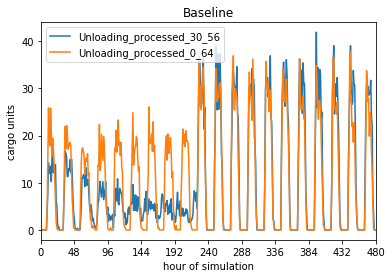

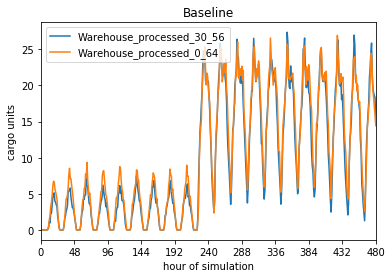

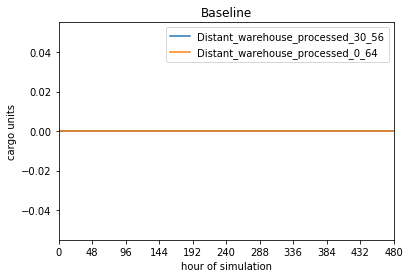

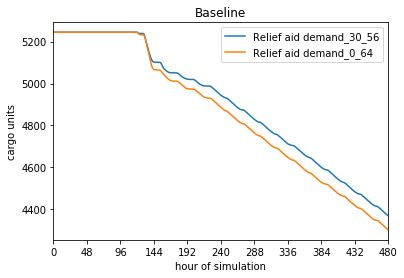

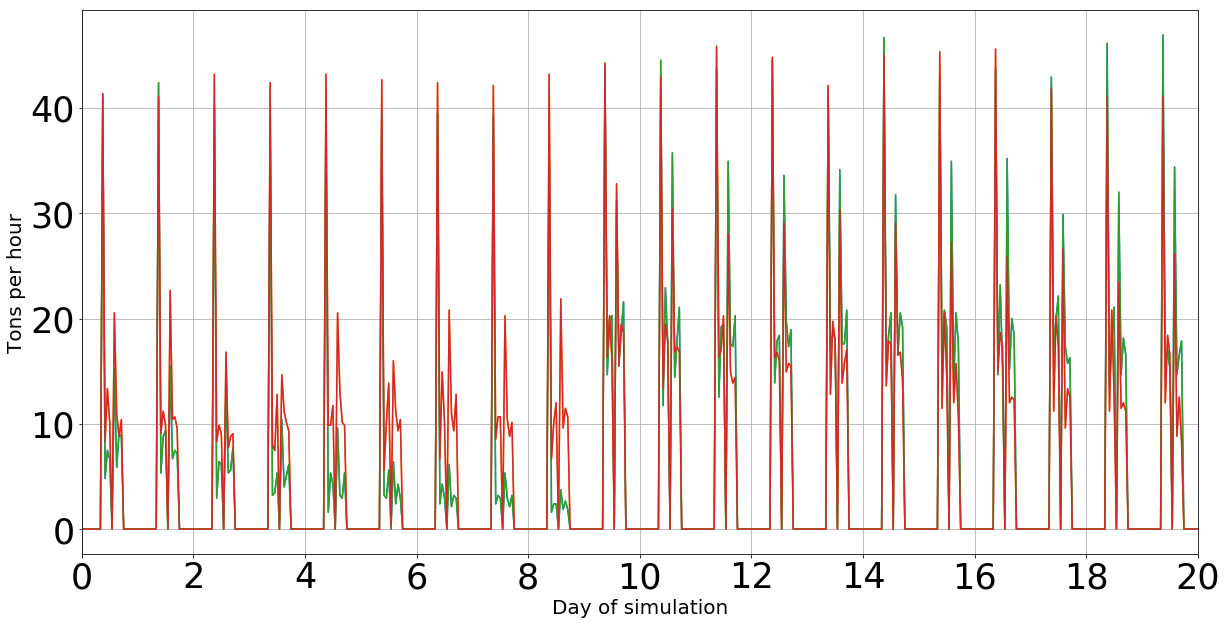

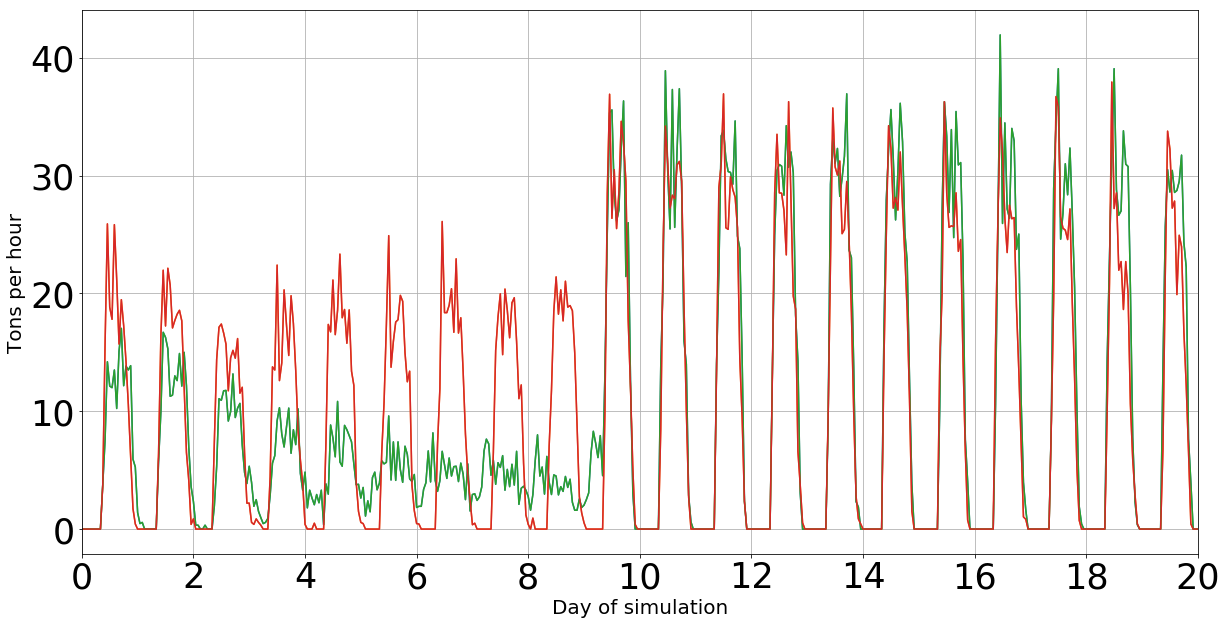

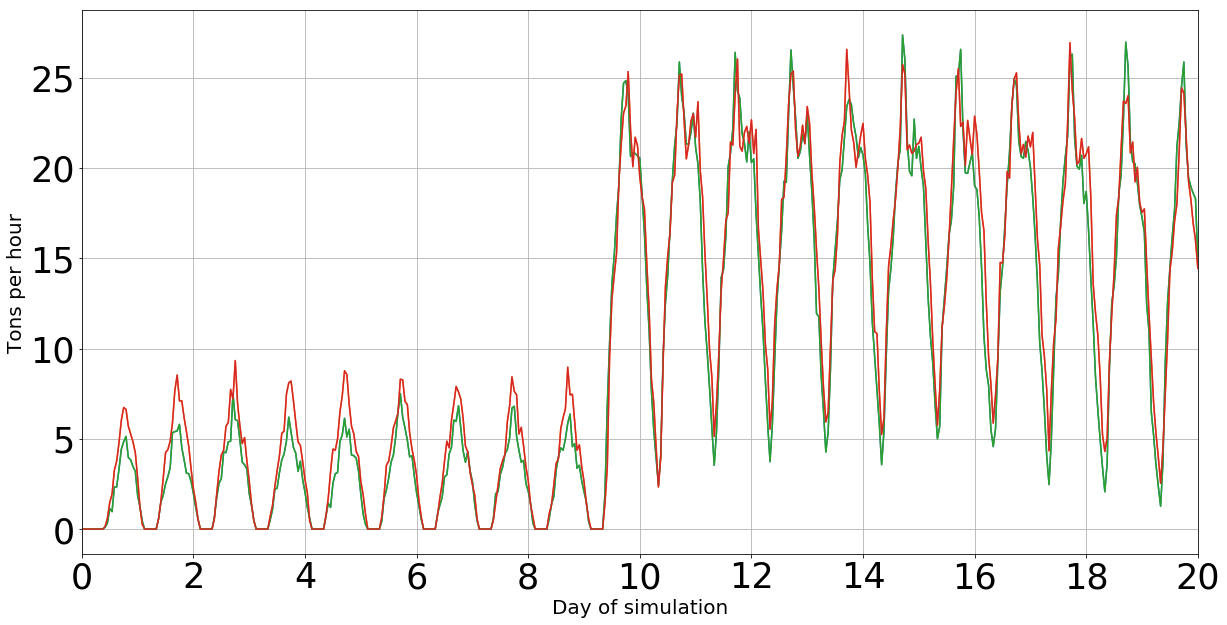

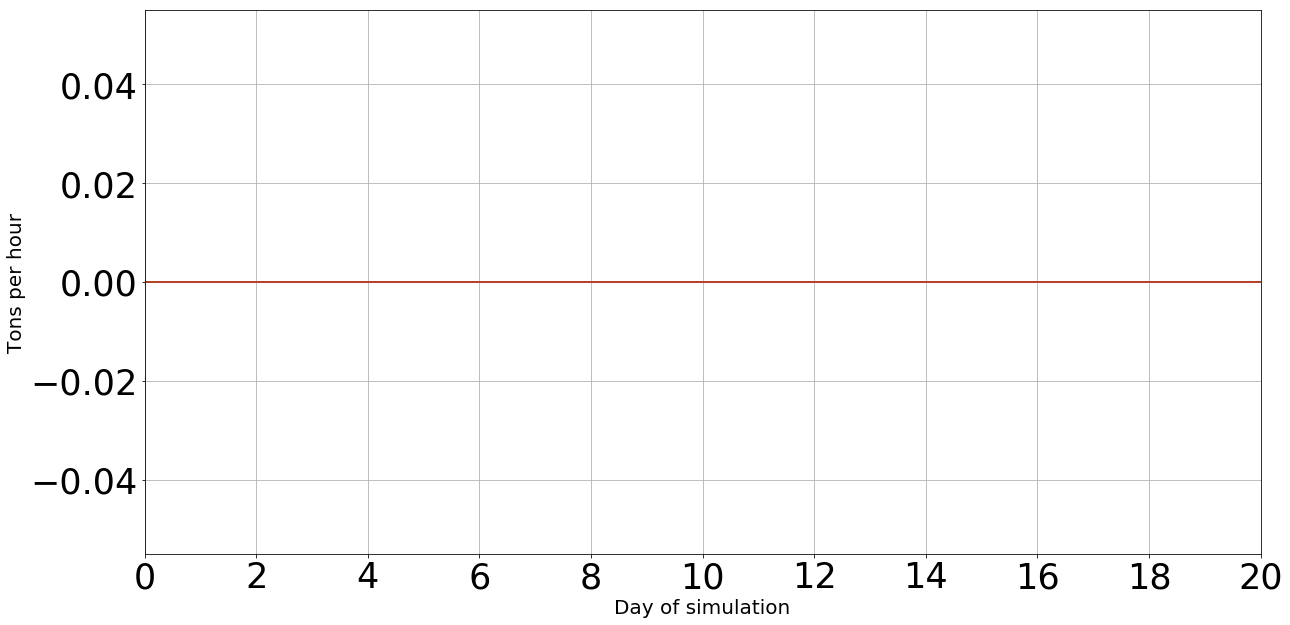

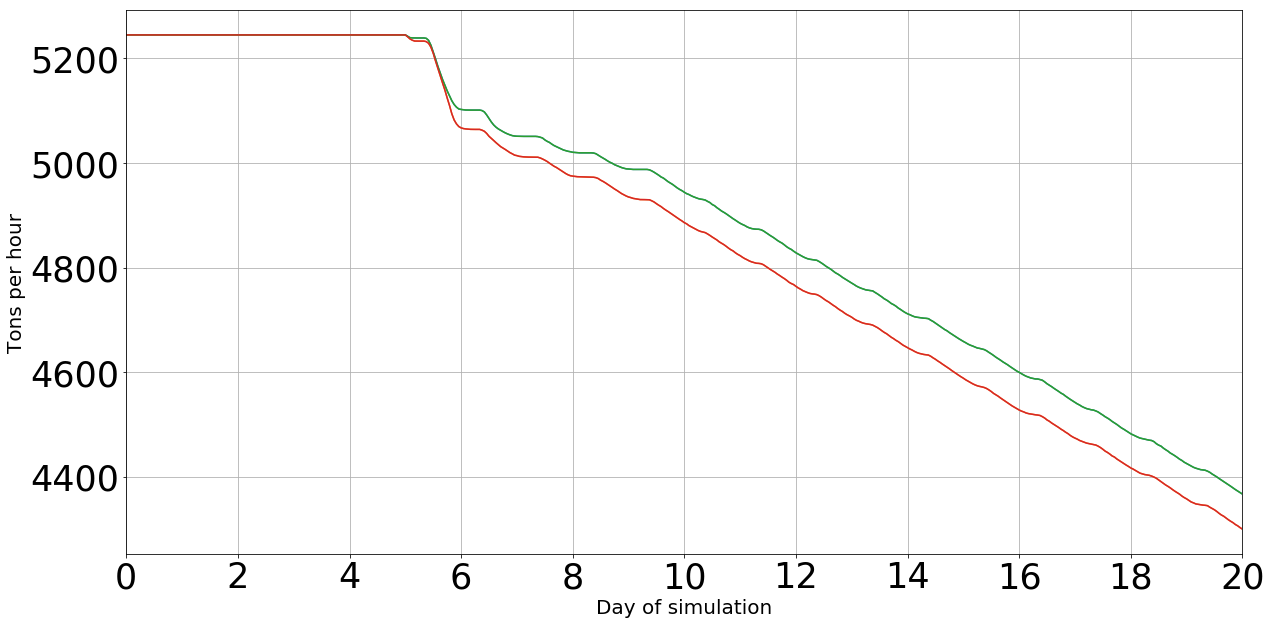

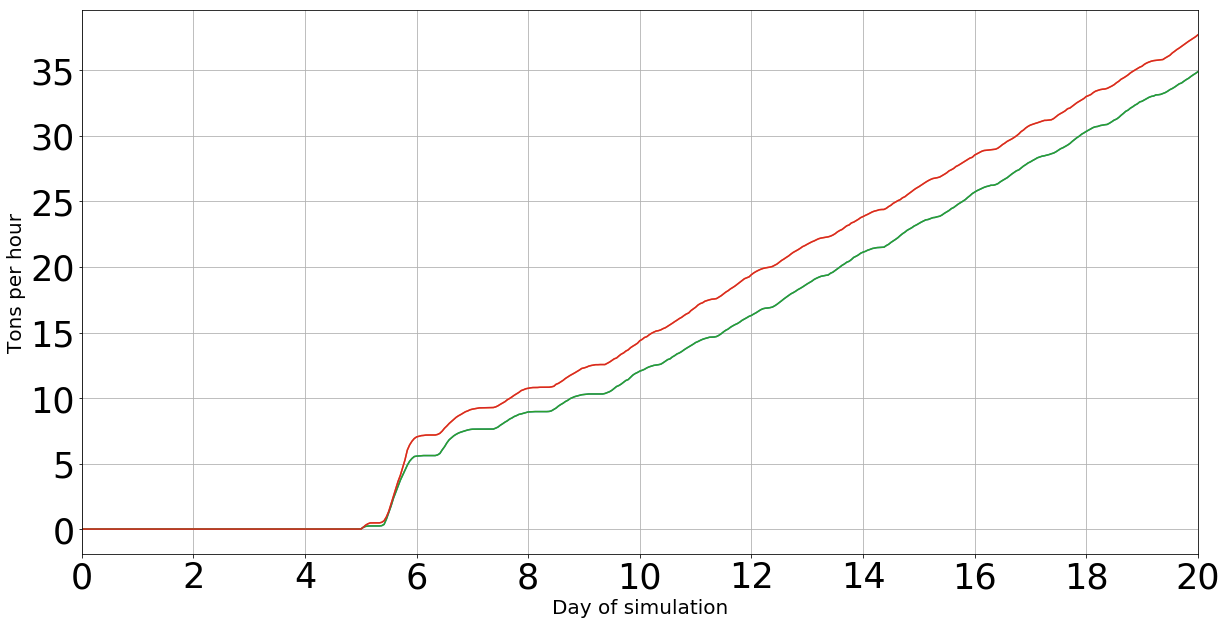

In [28]:
main(2,"Baseline", 30)

**First two scenario comparison with 30 percent no show and 64 workers compared to 0 percent no show and 56 workers**

In [ ]:
main(2,"MorePriorityItems", 30)

In [ ]:
main(5,"scenario",10)

In [ ]:
main(6,"scenario", 10)

**Sensitivity analysis**

In [10]:
def sensitivity(experiment_number, scenario, variable, replications):
    
    dic1 = todict(experiment_number, scenario, replications)[0]
    dic2 = todict(experiment_number, scenario, replications)[1]
    dic3 = todict(experiment_number, scenario, replications)[2]
    dic4 = todict(experiment_number, scenario, replications)[3]
    
    dic1 = dic1[["Time", variable]]
    dic2 = dic2[["Time", variable]]
    dic3 = dic3[["Time", variable]]
    dic4 = dic4[["Time", variable]]
      
    plt1 = dic1.plot(title = scenario, x = "Time", y = variable)
    plt2 = dic2.plot(title = scenario, x = "Time", y = variable)
    plt3 = dic3.plot(title = scenario, x = "Time", y = variable)
    plt4 = dic4.plot(title = scenario, x = "Time", y = variable)  
    
    fig = plt1.get_figure()
    fig.savefig("Sensitivity/" + scenario + variable + "_30_64")
    fig = plt2.get_figure()
    fig.savefig("Sensitivity/" + scenario + variable + "_0_56")
    fig = plt3.get_figure()
    fig.savefig("Sensitivity/" + scenario + variable + "_30_56")
    fig = plt4.get_figure()
    fig.savefig("Sensitivity/" + scenario + variable + "_0_64")

In [ ]:
sensitivity(4,'scenario','cargo_at_breakdwon', 10)

In [9]:
def BottleneckAnalysis(experiment_number, scenario, nr_alternatives, replications, process):
    dic = {}
    for i in range(nr_alternatives):
        dic[i+1] = {}
        for j in range(1, replications + 1):
            g = str(j)
            key = "rep" + g
            if(i == 0):
                name = "Output_model_Experiment" + str(experiment_number) + "_" + scenario + "_Rep" + g + ".xlsx"
            
            else:
                name = "Output_model_Experiment" + str(experiment_number) + "_" + scenario + str(i+1) + "_Rep" + g + ".xlsx"
            a = pd.read_excel(name)
            dic[i+1][key] = a[["Time", str(process)]].set_index("Time")
    return dic


In [ ]:
BottleneckAnalysis(4,"scenario", 6, 10, "cargo_at_breakdwon")

In [ ]:
plt.plot(BottleneckAnalysis(4,"scenario", 6, 10, "cargo_at_breakdwon")[6]['rep3'])

**Output creation**

In [ ]:
dic = BottleneckAnalysis(4,"scenario", 6, 10, "cargo_at_breakdwon")
dic.keys()

In [8]:
def outputdictionary(experiment_number, scenario, replications, a, b, c, d):
    dic1 = todict(experiment_number, scenario, replications)[6]
    dic2 = todict(experiment_number, scenario, replications)[7]
    dic3 = todict(experiment_number, scenario, replications)[8]
    dic4 = todict(experiment_number, scenario, replications)[9]
    
    dic_all = {str(str(scenario) + a) : dic1, str(str(scenario) + b) : dic2, str(str(scenario) + c) : dic3, str(str(scenario) + d) : dic4}
    
    dic_final={}
    for key, values in dic_all.items():
        df_concat=pd.concat(values.values())
        by_row_index=df_concat.groupby(df_concat.index)
        df_means=by_row_index.mean()
        dic_final[key]=df_means
        column_list=[]
        for i in dic_final[key].columns:
            j=i+"_"+key
            column_list.append(j)
        dic_final[key].columns=column_list
    
    dfs=[]
    for key, values in dic_final.items():
        dfs.append(values)  
    df_final = reduce(lambda left,right: pd.merge(left,right, left_index=True, right_index=True ,how='outer'), dfs)
    df_final["Time"]=df_final['Time_' + str(scenario) + a]/24
    x_steps=df_final.shape[0]
    
    return df_final

In [ ]:
outputdictionary(4,"scenario",10, "_30_64", "_0_56", "_30_56", "_0_64")


In [ ]:
dic = {}
experiment_number = 1
scenario = "Baseline"

for i in range(1, 31):
    j = str(i)
    key = "rep" + j
    name = "Output_model_Experiment" + str(experiment_number) + "_" + scenario + "_Rep" + j + ".xlsx"
    dic[key] = pd.read_excel(name)

In [ ]:
dic.keys()

In [ ]:
df = dic['rep1']

In [ ]:
df.columns

In [ ]:
Df = pd.DataFrame(columns = ['Time','cargo_at_breakdwon'])

In [ ]:
Df = dic['rep1'][["Time","cargo_at_breakdwon"]].set_index('Time')

In [ ]:
for i in range(1,31):
    b = "rep" + str(i)
    a = dic[b][["Time","cargo_at_breakdwon"]].set_index('Time')
    for j in range(1,481):
        Df['cargo_at_breakdwon'][j] = Df['cargo_at_breakdwon'][j] + a['cargo_at_breakdwon'][j] 
    Df['cargo_at_breakdwon'][i] = Df['cargo_at_breakdwon'][i]/30